In [1]:
import os 
from scipy import ndimage
from subprocess import check_output

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/dataset"))

# Any results you write to the current directory are saved as output.

['maindata', 'data1', 'data3', 'data2']


# Trying Template Matching

(<matplotlib.axes._subplots.AxesSubplot at 0x7f218c3cf4e0>,
 <matplotlib.image.AxesImage at 0x7f218d51b9e8>)

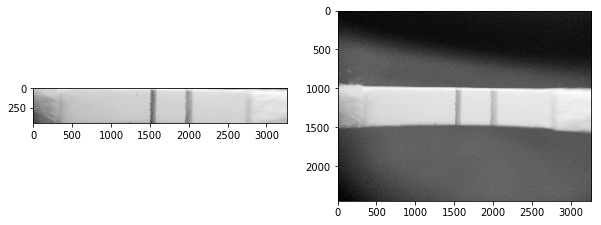

In [9]:
img_rows, img_cols= 450, 3264
im_array = cv2.imread('../input/dataset/data1/IMG_3087.JPG',0)
template = np.zeros([ img_rows, img_cols], dtype='uint8') # initialisation of the template
template[:, :] = im_array[1000:1450,:] # I try multiple times to find the correct rectangle. 
#template /= 255.
plt.subplots(figsize=(10, 7))
plt.subplot(121),plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

In [10]:
im_array = cv2.imread('../input/dataset/maindata/IMG_3066.JPG',0)
im_array.shape

(2448, 3264)

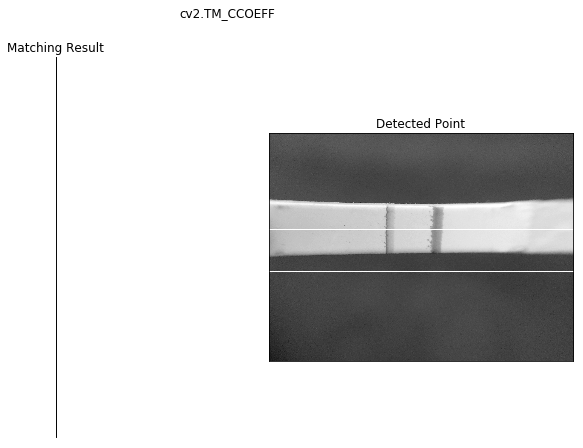

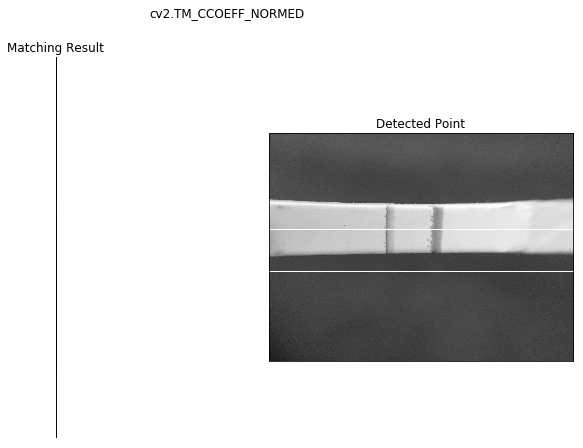

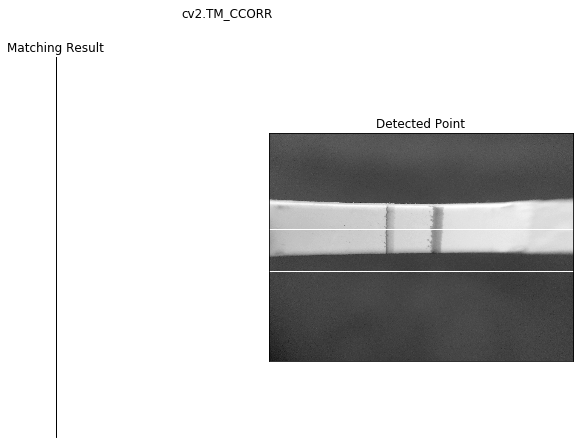

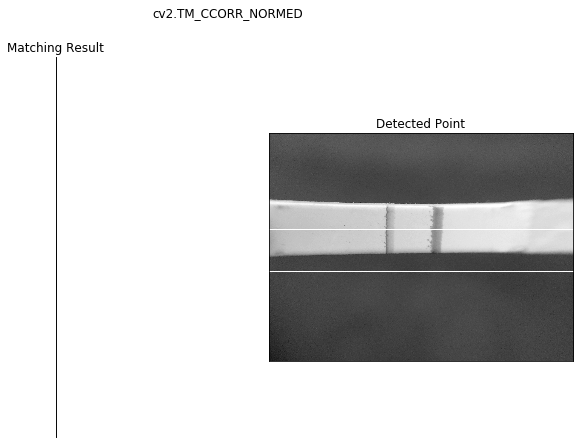

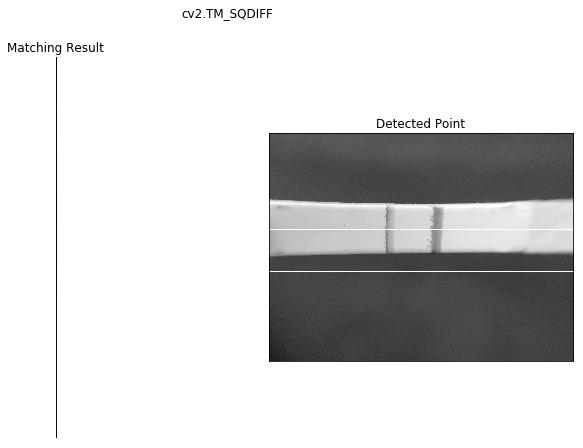

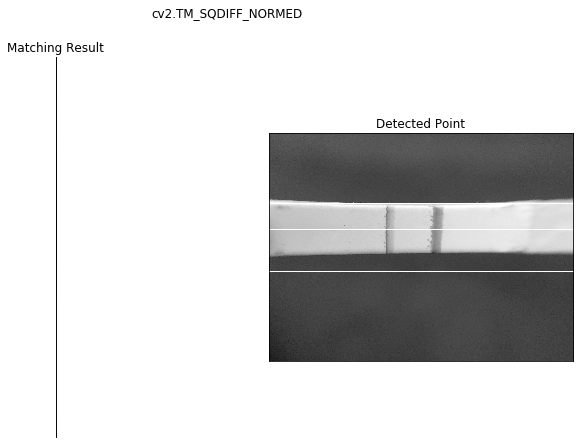

In [11]:
file_name = '../input/dataset/maindata/IMG_3066.JPG'
img = cv2.imread(file_name,0) 
img2 = img
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
     img = img2
     method = eval(meth)
 
     # Apply template Matching
     res = cv2.matchTemplate(img,template,method)
     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
 
     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
         top_left = min_loc
     else:
         top_left = max_loc
     bottom_right = (top_left[0] + w, top_left[1] + h)
    
     cv2.rectangle(img,top_left, bottom_right, 255, 2)
     fig, ax = plt.subplots(figsize=(12, 7))
     plt.subplot(121),plt.imshow(res,cmap = 'gray')
     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
     plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
     plt.suptitle(meth)
 
     plt.show()

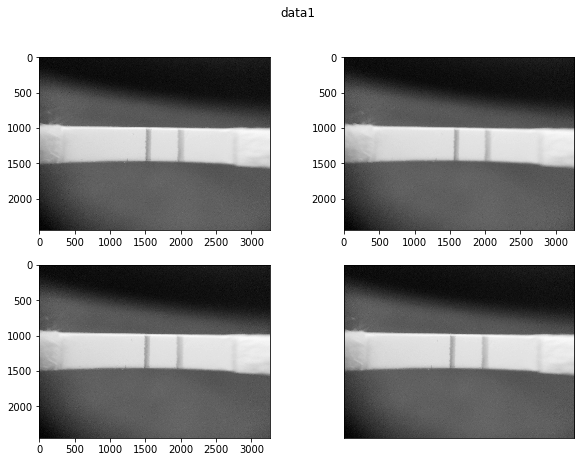

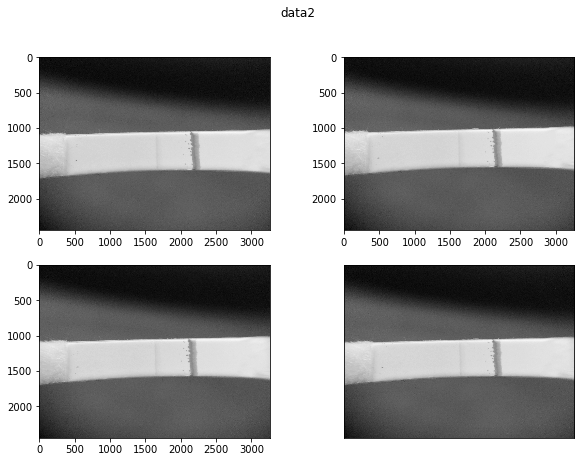

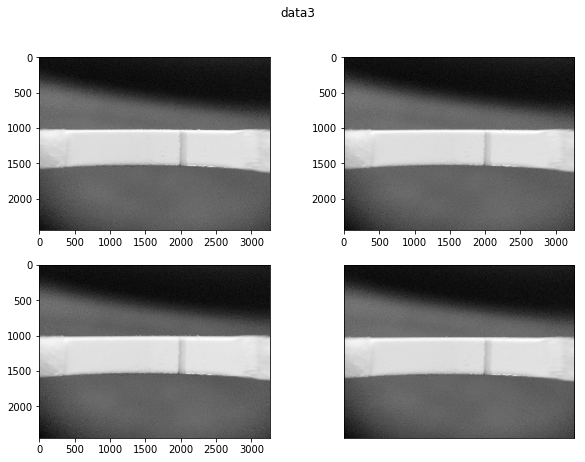

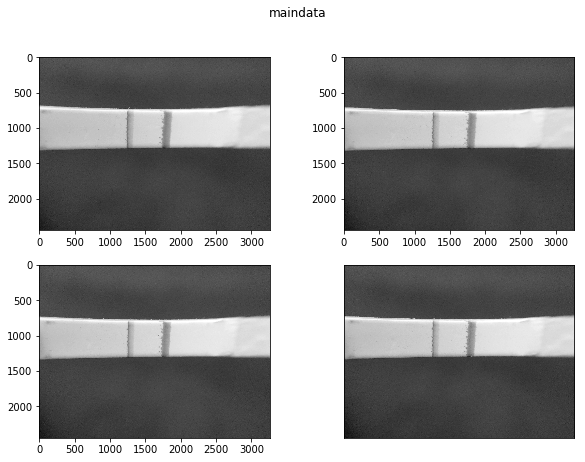

In [7]:
method = eval('cv2.TM_SQDIFF_NORMED')
indexes=[1,5,7,9]

train_path = "../input/dataset/"
sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
for sub_folder in sub_folders:
    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')
    k=0
    _, ax = plt.subplots(2,2,figsize=(10, 7))
    for file_name in [file_names[x] for x in indexes]: # I take only 4 images of each group. 
        img = cv2.imread(train_path+sub_folder+"/"+file_name,0)
        img2 = img
        w, h = template.shape[::-1]
        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
 
        cv2.rectangle(img,top_left, bottom_right,255, 2)
        if k==0 : 
            ax[0,0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==1 : 
            ax[0,1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==2 : 
            ax[1,0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==3 : 
            ax[1,1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        k=k+1
    plt.suptitle(sub_folder)
    plt.show()

# Not working properly. Try thresholding.